# Cohort Tracking

The use of non-representative samples of a population when doing research on health questions gives raise to serious issues, importantly:

- conclusions drawn on subgroups (by age, gender, race, ...) may not generalize to other subgroups
- underrepresented group's characteristics may be hidden by the overrepresented group's data
- models, such as clinical algorithms, trained on such samples may pick up, or even further amplify, biases in e.g. clinical decision making

For studies addressing medical questions, it is necessary to define exclusion and inclusion criteria.
To detect, track and monitor the effects of such criteria on the composition of the study cohort, [Ellen et al.](https://www.medrxiv.org/content/10.1101/2023.10.05.23296611v1.full.pdf) propose a visual aid in the form of a flowchart diagram.

Here, we show how ehrapy can help to track and visualize key demographics of interest during filtering steps.

## Environment setup

In [1]:
import ehrapy as ep
import ehrdata as ed
from tableone import TableOne

## Load the data

We load the Diabetes 130-Hospitals dataset, which comes with a convenience loader in ehrapy.

More information on the dataset can be found [here](https://archive.ics.uci.edu/dataset/296/diabetes+130-us+hospitals+for+years+1999-2008).
We use a preprocessed version by fairlearn, from which more information can be found [here](https://fairlearn.org/main/user_guide/datasets/diabetes_hospital_data.html).

In [3]:
edata = ed.dt.diabetes_130_fairlearn(columns_obs_only=["gender", "race", "time_in_hospital", "medicaid"])

! File ehrapy_data/diabetes_130_fairlearn.csv already exists! Using already downloaded dataset...


## Inspecting the dataset with `tableone`

In [4]:
TableOne(edata.obs, categorical=["gender", "race", "medicaid"])

Missing       Overall
n                                                          101766
gender, n (%)               Female                   54708 (53.8)
                            Male                     47055 (46.2)
                            Unknown/Invalid               3 (0.0)
race, n (%)                 AfricanAmerican          19210 (18.9)
                            Asian                       641 (0.6)
                            Caucasian                76099 (74.8)
                            Hispanic                   2037 (2.0)
                            Other                      1506 (1.5)
                            Unknown                    2273 (2.2)
time_in_hospital, mean (SD)                       0     4.4 (3.0)
medicaid, n (%)             False                    98234 (96.5)
                            True                       3532 (3.5)

In the following, we show how this view can be complemented in ehrapy with a graphical representation

## Inspecting the dataset with `CohortTracker`

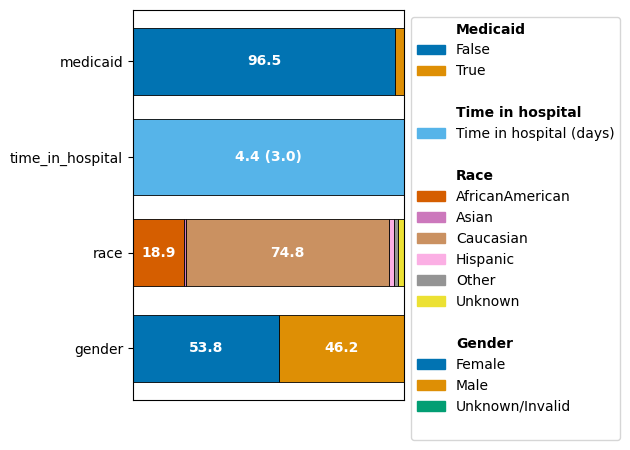

In [5]:
# instantiate the cohort tracker
ct = ep.tl.CohortTracker(edata, categorical=["gender", "race", "medicaid"])

# track the initial state of the dataset
ct(edata, label="Initial cohort")

# plot the change of the cohort
ct.plot_cohort_barplot(
    legend_subtitles_names={
        "medicaid": "Medicaid",
        "time_in_hospital": "Time in hospital",
        "race": "Race",
        "gender": "Gender",
    },
    legend_labels={"time_in_hospital": "Time in hospital (days)"},
)

## Tracking the processing and filtering of a dataset with `CohortTracker`

[Ellen et al.](https://www.medrxiv.org/content/10.1101/2023.10.05.23296611v1.full.pdf) advocate to integrate a detailed participant flow diagram into the workflow of data reporting to track the changes in sociodemographic and clinical characteristics of each phase of a study.

The `CohortTracker` allows logging filtering steps with optional comments to recover such a filtering flow.

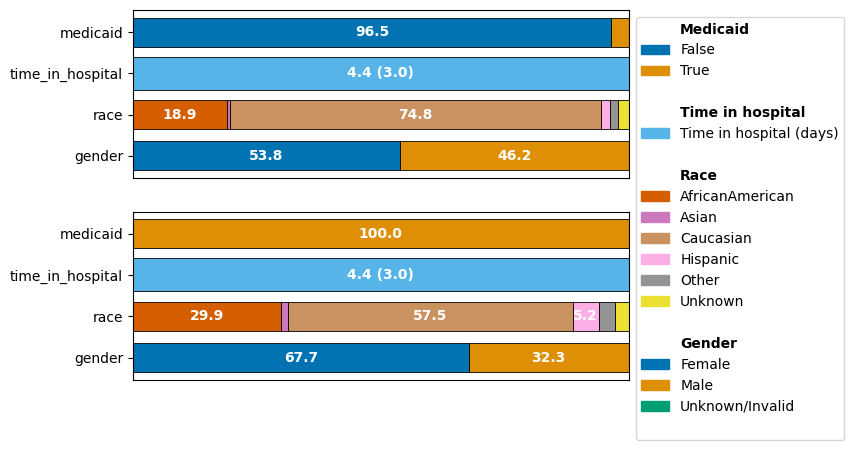

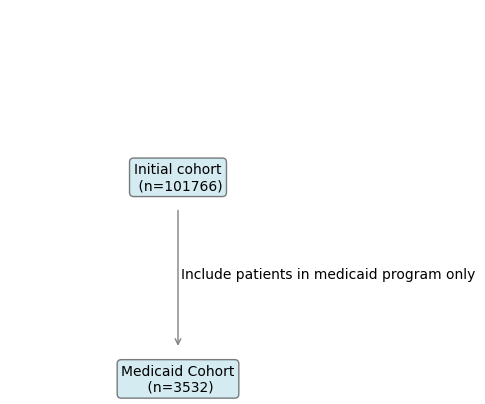

In [6]:
# instantiate the cohort tracker
ct = ep.tl.CohortTracker(edata, categorical=["gender", "race", "medicaid"])

# track the initial state of the dataset
ct(edata, label="Initial cohort")

# do a filtering step
edata = edata[edata.obs.medicaid]

# track the filtered dataset
ct(
    edata,
    label="Medicaid Cohort",
    operations_done="Include patients in medicaid program only",
)

# plot the change of the cohort
ct.plot_cohort_barplot(
    legend_subtitles_names={
        "medicaid": "Medicaid",
        "time_in_hospital": "Time in hospital",
        "race": "Race",
        "gender": "Gender",
    },
    legend_labels={"time_in_hospital": "Time in hospital (days)"},
    show=False,
)

# plot a flowchart
ct.plot_flowchart()

As we can see, focusing on the Medicaid cohort actually drastically shifts other demographics as well: The over-representation of the "Caucasian" population decreased and the imbalance between the representation of the genders is pronounced much more in this cohort.


## Customizing plots

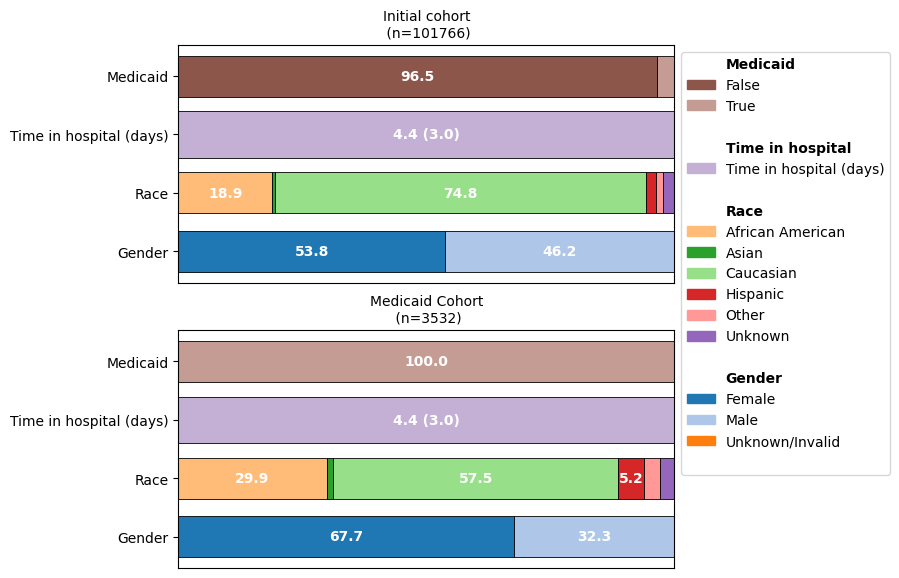

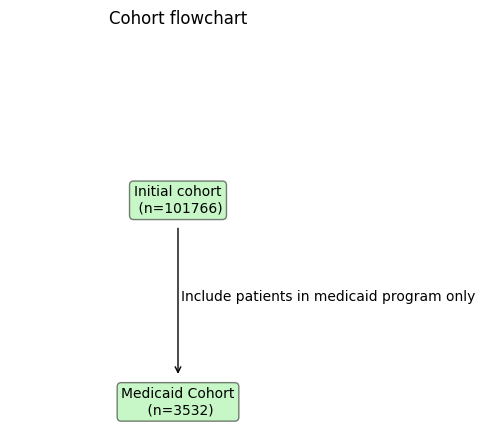

In [7]:
fig, ax = ct.plot_cohort_barplot(
    subfigure_title=True,
    yticks_labels={
        "medicaid": "Medicaid",
        "time_in_hospital": "Time in hospital (days)",
        "race": "Race",
        "gender": "Gender",
    },
    color_palette="tab20",
    legend_labels={
        "time_in_hospital": "Time in hospital (days)",
        "AfricanAmerican": "African American",
    },
    legend_subtitles_names={
        "medicaid": "Medicaid",
        "time_in_hospital": "Time in hospital",
        "race": "Race",
        "gender": "Gender",
    },
    show=False,
)
fig.subplots_adjust(top=1.2)

ct.plot_flowchart(
    title="Cohort flowchart",
    arrow_size=0.75,
    bbox_kwargs={"fc": "lightgreen"},
    arrowprops_kwargs={"color": "black"},
)